In [85]:
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt


def plot_network(
    G,
    node_size=1000,
    node_color="skyblue",
    edge_color="gray",
    font_size=10,
    title="Network Graph",
    figsize=(12, 8),
    with_labels=True,
    layout="spring",
    palette="husl",
    k=0.1,
):
    """
    Plot a network graph with seaborn-style aesthetics.

    Parameters:
    -----------
    G : networkx.Graph
        The network graph to visualize
    node_size : int or list
        Size of nodes (can be a single value or list for different sizes)
    node_color : str or list
        Color of nodes (can be a single value or list for different colors)
    edge_color : str
        Color of edges
    font_size : int
        Size of node labels
    title : str
        Title of the plot
    figsize : tuple
        Figure size (width, height)
    with_labels : bool
        Whether to show node labels
    layout : str
        Type of layout ('spring', 'circular', 'random', 'shell')
    palette : str
        Seaborn color palette to use if node_color is not specified

    Returns:
    --------
    fig, ax : tuple
        Matplotlib figure and axis objects
    """
    # Set the style
    sns.set_style("whitegrid")

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Choose layout
    layouts = {
        "spring": nx.spring_layout,
        "circular": nx.circular_layout,
        "random": nx.random_layout,
        "shell": nx.shell_layout,
    }
    pos = layouts.get(layout, nx.spring_layout)(G,k)

    # If node_color is not specified, use seaborn palette
    if isinstance(node_color, str) and node_color == "skyblue":
        colors = sns.color_palette(palette, n_colors=len(G.nodes()))
    else:
        colors = node_color

    # Draw the network
    nx.draw(
        G,
        pos,
        node_color=colors,
        node_size=node_size,
        edge_color=edge_color,
        with_labels=with_labels,
        font_size=font_size,
        font_weight="bold",
        ax=ax,
    )

    # Add title
    plt.title(title, fontsize=font_size + 4, pad=20)

    return fig, ax


In [86]:
# NOTE: USING langchain_experimental.graph_transformers main.
from dotenv import load_dotenv
import logging

logging.basicConfig(
    format="[%(asctime)s] p%(process)s {%(filename)s:%(lineno)d} %(levelname)s - %(message)s",
    level=logging.INFO,
)
logger = logging.getLogger(__name__)

load_dotenv()

import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")



In [87]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("gpt-4o-mini", model_provider="openai")


from typing_extensions import Annotated, TypedDict


# TypedDict
class Json(TypedDict):
    """Json to return."""

    setup: Annotated[dict, ..., "The setup of the dict"]
    depth: Annotated[int, ..., "How many layers deep the dict is."]


from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.documents import Document

text = """
Marie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.
She was, in 1906, the first woman to become a professor at the University of Paris.
"""

from langchain_experimental.graph_transformers import LLMGraphTransformer

llm_transformer = LLMGraphTransformer(llm=llm)
documents = [Document(page_content=text)]
logger.info(f"documents:{documents}")
graph_documents = llm_transformer.convert_to_graph_documents(documents)
for i, doc in enumerate(graph_documents):
    logger.info(f"document #{i+1}")
    nodes = doc.nodes
    relationships = doc.relationships
    for n in nodes:
        logger.info(f"Nodes:{n}")
    for r in relationships:
        logger.info(f"Relationships:{r}")



[2025-03-08 19:18:45,734] p14536 {4265423800.py:31} INFO - documents:[Document(metadata={}, page_content='\nMarie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.\nShe was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.\nHer husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.\nShe was, in 1906, the first woman to become a professor at the University of Paris.\n')]
[2025-03-08 19:18:50,368] p14536 {_client.py:1025} INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
[2025-03-08 19:18:50,387] p14536 {4265423800.py:34} INFO - document #1
[2025-03-08 19:18:50,388] p14536 {4265423800.py:38} INFO - Nodes:id='Marie Curie' type='Person' proper

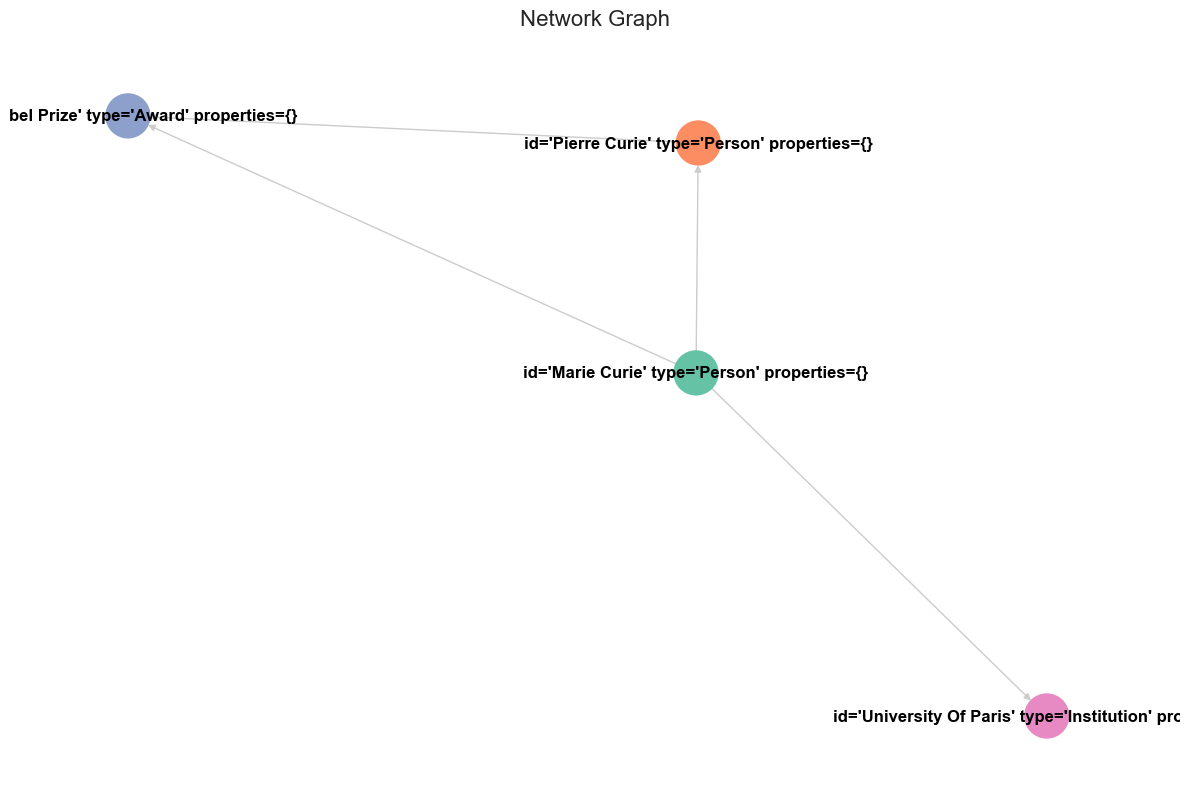

In [88]:
# from plot_graph import plot_network
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

nodes = [str(node) for node in graph_documents[0].nodes]
relationships = [
    (str(rel.source), str(rel.target)) for rel in graph_documents[0].relationships
]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(relationships)

custom_colors = sns.color_palette("Set2", n_colors=len(G.nodes()))
node_sizes = [3000 if d > 5 else 1000 for v, d in G.degree()]

fig, ax = plot_network(
    G,
    node_size=node_sizes,
    node_color=custom_colors,
    edge_color="#cccccc",
    font_size=12,
    layout="spring",
    palette="Set2",
)

plt.tight_layout()
plt.show()



In [7]:
nodes

["id='Marie Curie' type='Person' properties={}",
 "id='Pierre Curie' type='Person' properties={}",
 "id='University Of Paris' type='Institution' properties={}",
 "id='Nobel Prize' type='Award' properties={}",
 "id='Radioactivity' type='Scientificresearch' properties={}"]

In [8]:
relationships

[("id='Marie Curie' type='Person' properties={}",
  "id='Nobel Prize' type='Award' properties={}"),
 ("id='Marie Curie' type='Person' properties={}",
  "id='Radioactivity' type='Scientificresearch' properties={}"),
 ("id='Marie Curie' type='Person' properties={}",
  "id='Pierre Curie' type='Person' properties={}"),
 ("id='Pierre Curie' type='Person' properties={}",
  "id='Nobel Prize' type='Award' properties={}"),
 ("id='Marie Curie' type='Person' properties={}",
  "id='University Of Paris' type='Institution' properties={}")]

In [9]:
# NOTE: Using classic llm.with_structured_output(json) approach

messages = [
    SystemMessage(
        "Return a json that describes the logic flow of the given codebase. Only track call stacks. Output in Cypher compliant format for graph representation."
    ),
    HumanMessage(
        """
            def greet(name):
                return f"Hello, {name}!"

            def add(a, b):
                return a + b

            def main():
                name = input("Enter your name: ")
                print(greet(name))

                try:
                    x = float(input("Enter first number: "))
                    y = float(input("Enter second number: "))
                    print(f"The sum is: {add(x, y)}")
                except ValueError:
                    print("Invalid input. Please enter numbers.")

            if __name__ == "__main__":
                main()
            """
    ),
]



In [10]:
messages = [
    SystemMessage(
        # "Return a json that describes the logic flow of the given codebase. Only track call stacks. Output in Cypher compliant format for graph representation."
        """
        Return a list of json with all the functions as nodes. 
        Return description on logic flow of funcitons and how other functions are used within the given function
        {
        node: name of function,
        parameters : list of all parameters used in the function,
        realtionship: list relationships between functions for all nodes such as 'add to main' or 'greet to main'
        }
        """
    ),
    HumanMessage(
        """
            def greet(name):
                return f"Hello, {name}!"

            def add(a, b):
                return a + b

            def main():
                name = input("Enter your name: ")
                print(greet(name))

                try:
                    x = float(input("Enter first number: "))
                    y = float(input("Enter second number: "))
                    print(f"The sum is: {add(x, y)}")
                except ValueError:
                    print("Invalid input. Please enter numbers.")

            if __name__ == "__main__":
                main()
            """
    ),
]

structured_llm = llm.with_structured_output(Json)
response = structured_llm.invoke(messages)
print(response)

[2025-03-08 18:58:51,790] p14536 {_client.py:1025} INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'setup': {'functions': [{'node': 'greet', 'parameters': ['name'], 'relationship': ['greet to main']}, {'node': 'add', 'parameters': ['a', 'b'], 'relationship': ['add to main']}, {'node': 'main', 'parameters': [], 'relationship': ['main to __main__']}]}, 'depth': 2}


In [112]:
messages = [
    SystemMessage(
        # "Return a json that describes the logic flow of the given codebase. Only track call stacks. Output in Cypher compliant format for graph representation."
        """
        Return the given code as natural language description with great detail.
        Explain all the functions, parameters, and the logic flow of the code.
        EXPLAIN EVERY SINGLE LINE OF THE CODE
        Also include packages that were imported and how they were used in the code.
        Do not give me bullet points, and output a paragraph format.
        Do not use ambiguous pronouns and be as detailed as possible.
        """
    ),
    HumanMessage(
        '''
        # An agent designed to hold a conversation in addition to using tools.

        from __future__ import annotations

        from typing import Any, List, Optional, Sequence

        from langchain_core._api import deprecated
        from langchain_core.callbacks import BaseCallbackManager
        from langchain_core.language_models import BaseLanguageModel
        from langchain_core.prompts import PromptTemplate
        from langchain_core.tools import BaseTool
        from pydantic import Field

        from langchain._api.deprecation import AGENT_DEPRECATION_WARNING
        from langchain.agents.agent import Agent, AgentOutputParser
        from langchain.agents.agent_types import AgentType
        from langchain.agents.conversational.output_parser import ConvoOutputParser
        from langchain.agents.conversational.prompt import FORMAT_INSTRUCTIONS, PREFIX, SUFFIX
        from langchain.agents.utils import validate_tools_single_input
        from langchain.chains import LLMChain


        @deprecated(
            "0.1.0",
            message=AGENT_DEPRECATION_WARNING,
            removal="1.0",
        )
        class ConversationalAgent(Agent):
            """An agent that holds a conversation in addition to using tools."""

            ai_prefix: str = "AI"
            """Prefix to use before AI output."""
            output_parser: AgentOutputParser = Field(default_factory=ConvoOutputParser)
            """Output parser for the agent."""

            @classmethod
            def _get_default_output_parser(
                cls, ai_prefix: str = "AI", **kwargs: Any
            ) -> AgentOutputParser:
                return ConvoOutputParser(ai_prefix=ai_prefix)

            @property
            def _agent_type(self) -> str:
                """Return Identifier of agent type."""
                return AgentType.CONVERSATIONAL_REACT_DESCRIPTION

            @property
            def observation_prefix(self) -> str:
                """Prefix to append the observation with.

                Returns:
                    "Observation: "
                """
                return "Observation: "

            @property
            def llm_prefix(self) -> str:
                """Prefix to append the llm call with.

                Returns:
                    "Thought: "
                """
                return "Thought:"

            @classmethod
            def create_prompt(
                cls,
                tools: Sequence[BaseTool],
                prefix: str = PREFIX,
                suffix: str = SUFFIX,
                format_instructions: str = FORMAT_INSTRUCTIONS,
                ai_prefix: str = "AI",
                human_prefix: str = "Human",
                input_variables: Optional[List[str]] = None,
            ) -> PromptTemplate:
                """Create prompt in the style of the zero-shot agent.

                Args:
                    tools: List of tools the agent will have access to, used to format the
                        prompt.
                    prefix: String to put before the list of tools. Defaults to PREFIX.
                    suffix: String to put after the list of tools. Defaults to SUFFIX.
                    format_instructions: Instructions on how to use the tools. Defaults to
                        FORMAT_INSTRUCTIONS
                    ai_prefix: String to use before AI output. Defaults to "AI".
                    human_prefix: String to use before human output.
                        Defaults to "Human".
                    input_variables: List of input variables the final prompt will expect.
                        Defaults to ["input", "chat_history", "agent_scratchpad"].

                Returns:
                    A PromptTemplate with the template assembled from the pieces here.
                """
                tool_strings = "\n".join(
                    [f"> {tool.name}: {tool.description}" for tool in tools]
                )
                tool_names = ", ".join([tool.name for tool in tools])
                format_instructions = format_instructions.format(
                    tool_names=tool_names, ai_prefix=ai_prefix, human_prefix=human_prefix
                )
                template = "\n\n".join([prefix, tool_strings, format_instructions, suffix])
                if input_variables is None:
                    input_variables = ["input", "chat_history", "agent_scratchpad"]
                return PromptTemplate(template=template, input_variables=input_variables)

            @classmethod
            def _validate_tools(cls, tools: Sequence[BaseTool]) -> None:
                super()._validate_tools(tools)
                validate_tools_single_input(cls.__name__, tools)

            @classmethod
            def from_llm_and_tools(
                cls,
                llm: BaseLanguageModel,
                tools: Sequence[BaseTool],
                callback_manager: Optional[BaseCallbackManager] = None,
                output_parser: Optional[AgentOutputParser] = None,
                prefix: str = PREFIX,
                suffix: str = SUFFIX,
                format_instructions: str = FORMAT_INSTRUCTIONS,
                ai_prefix: str = "AI",
                human_prefix: str = "Human",
                input_variables: Optional[List[str]] = None,
                **kwargs: Any,
            ) -> Agent:
                """Construct an agent from an LLM and tools.

                Args:
                    llm: The language model to use.
                    tools: A list of tools to use.
                    callback_manager: The callback manager to use. Default is None.
                    output_parser: The output parser to use. Default is None.
                    prefix: The prefix to use in the prompt. Default is PREFIX.
                    suffix: The suffix to use in the prompt. Default is SUFFIX.
                    format_instructions: The format instructions to use.
                        Default is FORMAT_INSTRUCTIONS.
                    ai_prefix: The prefix to use before AI output. Default is "AI".
                    human_prefix: The prefix to use before human output.
                        Default is "Human".
                    input_variables: The input variables to use. Default is None.
                    **kwargs: Any additional keyword arguments to pass to the agent.

                Returns:
                    An agent.
                """
                cls._validate_tools(tools)
                prompt = cls.create_prompt(
                    tools,
                    ai_prefix=ai_prefix,
                    human_prefix=human_prefix,
                    prefix=prefix,
                    suffix=suffix,
                    format_instructions=format_instructions,
                    input_variables=input_variables,
                )
                llm_chain = LLMChain(  # type: ignore[misc]
                    llm=llm,
                    prompt=prompt,
                    callback_manager=callback_manager,
                )
                tool_names = [tool.name for tool in tools]
                _output_parser = output_parser or cls._get_default_output_parser(
                    ai_prefix=ai_prefix
                )
                return cls(
                    llm_chain=llm_chain,
                    allowed_tools=tool_names,
                    ai_prefix=ai_prefix,
                    output_parser=_output_parser,
                    **kwargs,
                )
            '''
    ),
]

# structured_llm = llm.with_structured_output(Json)
response = llm.invoke(messages)
print(response.content)

[2025-03-08 19:27:22,432] p14536 {_client.py:1025} INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The provided code defines a class named `ConversationalAgent`, which is a specialized type of agent designed to facilitate conversations while also utilizing various tools. This class is part of a larger framework that likely deals with natural language processing and conversational AI, specifically using the LangChain library. The code begins by importing several modules and classes from the LangChain library and other necessary packages. The `__future__` import statement allows for the use of features that will be available in future versions of Python, ensuring forward compatibility. The `typing` module is imported to provide type hints for better code clarity and type checking, including `Any`, `List`, `Optional`, and `Sequence`.

The `ConversationalAgent` class is marked as deprecated, indicating that it is intended for removal in a future version of the library. This is communicated through a decorator that includes a version number and a warning message. The class inherits from 

In [113]:
text = response.content

from langchain_experimental.graph_transformers import LLMGraphTransformer

llm_transformer = LLMGraphTransformer(llm=llm)
documents = [Document(page_content=text)]
# logger.info(f"documents:{documents}")
graph_documents = llm_transformer.convert_to_graph_documents(documents)

[2025-03-08 19:27:28,655] p14536 {_client.py:1025} INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [116]:
documents[0].page_content

'The provided code defines a class named `ConversationalAgent`, which is a specialized type of agent designed to facilitate conversations while also utilizing various tools. This class is part of a larger framework that likely deals with natural language processing and conversational AI, specifically using the LangChain library. The code begins by importing several modules and classes from the LangChain library and other necessary packages. The `__future__` import statement allows for the use of features that will be available in future versions of Python, ensuring forward compatibility. The `typing` module is imported to provide type hints for better code clarity and type checking, including `Any`, `List`, `Optional`, and `Sequence`.\n\nThe `ConversationalAgent` class is marked as deprecated, indicating that it is intended for removal in a future version of the library. This is communicated through a decorator that includes a version number and a warning message. The class inherits fr

In [114]:
for i, doc in enumerate(graph_documents):
    logger.info(f"document #{i+1}")
    nodes = doc.nodes
    relationships = doc.relationships
    for n in nodes:
        logger.info(f"Nodes:{n}")
    for r in relationships:
        logger.info(f"Relationships:{r}")

[2025-03-08 19:27:28,687] p14536 {406922825.py:2} INFO - document #1
[2025-03-08 19:27:28,688] p14536 {406922825.py:6} INFO - Nodes:id='Conversationalagent' type='Class' properties={}
[2025-03-08 19:27:28,689] p14536 {406922825.py:6} INFO - Nodes:id='Agent' type='Class' properties={}
[2025-03-08 19:27:28,690] p14536 {406922825.py:6} INFO - Nodes:id='Convooutputparser' type='Class' properties={}
[2025-03-08 19:27:28,690] p14536 {406922825.py:6} INFO - Nodes:id='Prompttemplate' type='Class' properties={}
[2025-03-08 19:27:28,691] p14536 {406922825.py:6} INFO - Nodes:id='Llmchain' type='Class' properties={}
[2025-03-08 19:27:28,692] p14536 {406922825.py:6} INFO - Nodes:id='Langchain' type='Library' properties={}
[2025-03-08 19:27:28,694] p14536 {406922825.py:6} INFO - Nodes:id='Python' type='Language' properties={}
[2025-03-08 19:27:28,695] p14536 {406922825.py:6} INFO - Nodes:id='Typing' type='Module' properties={}
[2025-03-08 19:27:28,695] p14536 {406922825.py:6} INFO - Nodes:id='Any' t

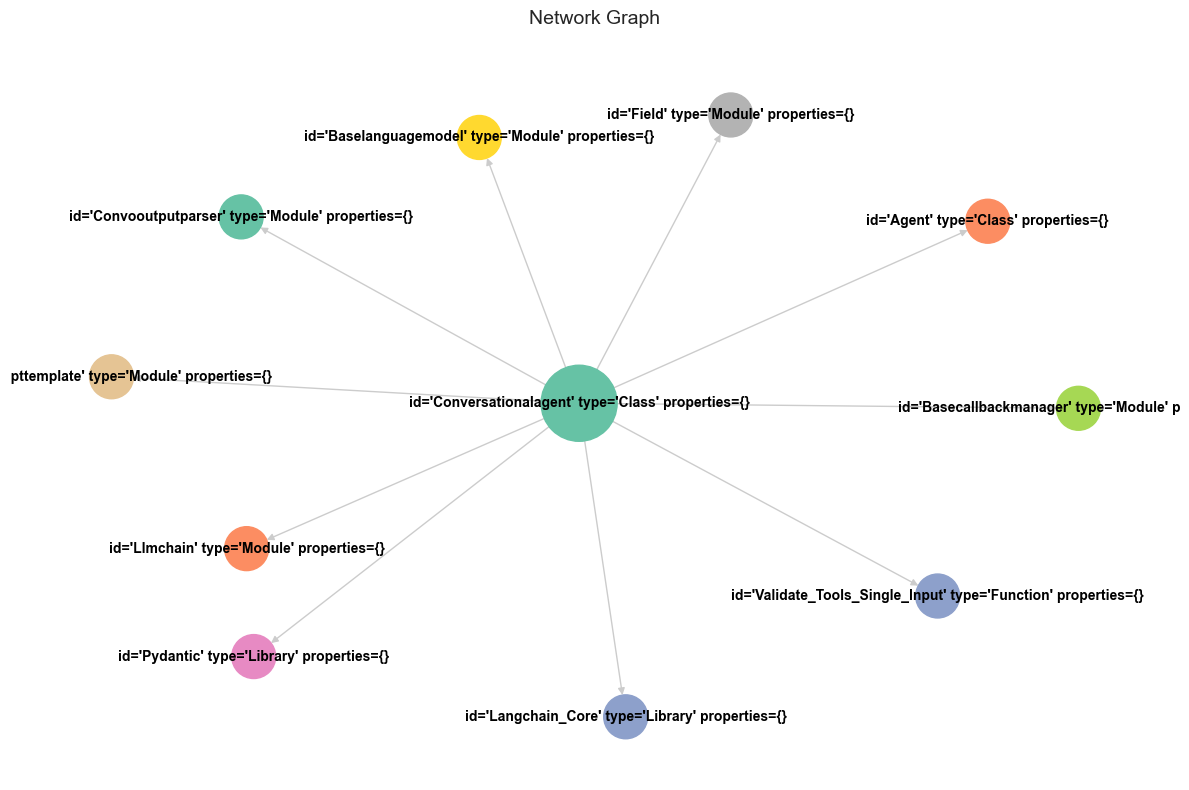

In [92]:
# from plot_graph import plot_network
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

nodes = [str(node) for node in graph_documents[0].nodes]
relationships = [
    (str(rel.source), str(rel.target)) for rel in graph_documents[0].relationships
]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(relationships)

custom_colors = sns.color_palette("Set2", n_colors=len(G.nodes()))
node_sizes = [3000 if d > 5 else 1000 for v, d in G.degree()]



fig, ax = plot_network(
    G,
    node_size=node_sizes,
    node_color=custom_colors,
    edge_color="#cccccc",
    font_size=10,
    layout="spring",
    palette="Set2",
)

plt.tight_layout()
plt.show()



In [93]:
# https://python.langchain.com/docs/integrations/graphs/memgraph/

from langchain_community.graphs import MemgraphGraph
from langchain_community.chains.graph_qa.memgraph import MemgraphQAChain
import os

url = os.environ.get("MEMGRAPH_URI", "bolt://localhost:7687")
username = os.environ.get("MEMGRAPH_USERNAME", "")
password = os.environ.get("MEMGRAPH_PASSWORD", "")
 
graph = MemgraphGraph(
    url=url, username=username, password=password, refresh_schema=False
)

In [94]:
# Make sure the database is empty
graph.query("STORAGE MODE IN_MEMORY_ANALYTICAL")
graph.query("DROP GRAPH")
graph.query("STORAGE MODE IN_MEMORY_TRANSACTIONAL")
 
# Create KG
graph.add_graph_documents(graph_documents)

[2025-03-08 19:19:46,996] p14536 {memgraph_graph.py:450} INFO - Schema generation with SHOW SCHEMA INFO query failed. Set --schema-info-enabled=true to use SHOW SCHEMA INFO query. Falling back to alternative queries.


In [95]:
print(graph.schema)


Node labels and properties (name and type) are:
- labels: (:Class)
  properties:
    - id: string
- labels: (:Module)
  properties:
    - id: string
- labels: (:Library)
  properties:
    - id: string
- labels: (:Function)
  properties:
    - id: string

Nodes are connected with the following relationships:
(:Class)-[:USES]->(:Function)
(:Class)-[:USES]->(:Module)
(:Class)-[:USES]->(:Library)
(:Class)-[:INHERITS]->(:Class)



In [109]:
from langchain_core.prompts import PromptTemplate

llm = init_chat_model("gpt-4o-mini", model_provider="openai",temperature=0)

MEMGRAPH_GENERATION_TEMPLATE = """
Your task is to directly translate natural language inquiry into precise and executable Cypher query for Memgraph database. 
You will utilize a provided database schema to understand the structure, nodes and relationships within the Memgraph database.
Instructions: 
- Use provided node and relationship labels and property names from the
schema which describes the database's structure. Upon receiving a user
question, synthesize the schema to craft a precise Cypher query that
directly corresponds to the user's intent. 
- Generate valid executable Cypher queries on top of Memgraph database. 
Any explanation, context, or additional information that is not a part 
of the Cypher query syntax should be omitted entirely. 
- Use Memgraph MAGE procedures instead of Neo4j APOC procedures. 
- Do not include any explanations or apologies in your responses. 
- Do not include any text except the generated Cypher statement.
- For queries that ask for information or functionalities outside the direct
generation of Cypher queries, use the Cypher query format to communicate
limitations or capabilities. For example: RETURN "I am designed to generate
Cypher queries based on the provided schema only."
Schema: 
{schema}

With all the above information and instructions, generate Cypher query for the
user question. 

The question is:
{question}
"""


MEMGRAPH_GENERATION_PROMPT = PromptTemplate(
    input_variables=["schema", "question"], template=MEMGRAPH_GENERATION_TEMPLATE
)


chain = MemgraphQAChain.from_llm(
    llm,
    cypher_prompt=MEMGRAPH_GENERATION_PROMPT,
    graph=graph,
    model_id="gpt-4o-mini",
    return_intermediate_steps=True,
    allow_dangerous_requests=True,
)

In [111]:
q = "What is connected to the Conversationalagent?"
response = chain.invoke(q)
print(response['result'])

[2025-03-08 19:26:25,892] p14536 {_client.py:1025} INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
[2025-03-08 19:26:28,397] p14536 {_client.py:1025} INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The Conversationalagent is connected to the following components: Agent (INHERITS), Langchain_Core (USES), Pydantic (USES), Basecallbackmanager (USES), Baselanguagemodel (USES), Prompttemplate (USES), Field (USES), Convooutputparser (USES), Llmchain (USES), and Validate_Tools_Single_Input (USES).


In [99]:
response

{'query': 'Explain everything you know about the Conversationalagent',
 'result': 'I am designed to generate Cypher queries based on the provided schema only.',
 'intermediate_steps': [{'query': 'RETURN "I am designed to generate Cypher queries based on the provided schema only."'},
  {'context': [{'"I am designed to generate Cypher queries based on the provided schema only."': 'I am designed to generate Cypher queries based on the provided schema only.'}]}]}

In [ ]:
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=["Person", "Nationality", "Concept"],
#     allowed_relationships=["NATIONALITY", "INVOLVED_IN", "COLLABORATES_WITH"],
# )
# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(
#     documents
# )

# print(f"Nodes:{graph_documents_filtered[0].nodes}")
# print(f"Relationships:{graph_documents_filtered[0].relationships}")